<a href="https://colab.research.google.com/github/MariaLuize/Inteligencia-Computacional/blob/main/MNISTarvoreIC_MariaLuize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aluna: Maria Luize Silva Pinheiro**


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
# from sklearn.model_selection import cross_val_score
from pprint import pprint
 
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys() # dictionary structure

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X.shape #shape of the data - There are 70,000 images, and each image has 784 features.

(70000, 784)

(-0.5, 27.5, 27.5, -0.5)

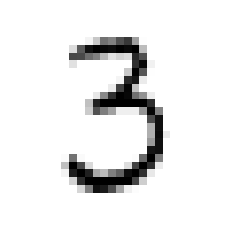

In [ ]:
some_digit = X[50] #grab an instance’s feature vector
some_digit_image = some_digit.reshape(28, 28) #reshape it to a 28 × 28 array
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


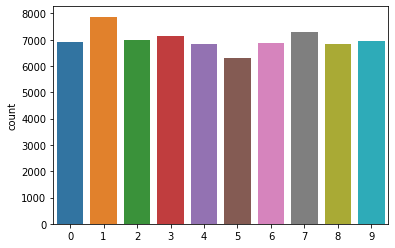

In [ ]:
sns.countplot(y)

# Data preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(52500, 784)
(17500, 784)


# **Random Forest Regressor**

---
 **Plain Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred_reg_plain  = forest_reg.predict(X_test)

Evaluation Metrics

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_reg_plain))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_reg_plain))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg_plain)))

Mean Absolute Error: 0.4812337142857142
Mean Squared Error: 0.9303290228571429
Root Mean Squared Error: 0.9645356514184134


---
**Random Forest Regressor with Randomized Search**

In [ ]:
from scipy.stats import randint
 
 
param_distribs  = {
        'n_estimators': randint(low=50, high=150),
        'max_features': ['auto', 'sqrt']
    }
 
forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
RFreg_random = RandomizedSearchCV(forest_reg, 
                                  param_distributions=param_distribs,
                                  n_iter=10,
                                  refit=True,
                                  cv=5, 
                                  scoring='neg_mean_squared_error',               
                                  random_state=42)
RFreg_random.fit(X_train, y_train)

In [ ]:
cvres = RFreg_random.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
RFreg_random.best_params_

Prediction


In [ ]:
RFreg_final = RFreg_random.best_estimator_
y_pred_reg  = RFreg_final.predict(X_test)

Evaluation Metrics

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_reg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))

# Random Forest Classifier



Dataset split

In [ ]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

---
**Plain Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_claPlain = rfc.predict(X_test)

Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy Score:", accuracy_score(y_test, y_pred_claPlain))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_claPlain))
print("Classification Report:\n", classification_report(y_test,y_pred_claPlain))

Confusion Matrix:
 [[1693    0    1    0    2    3    6    0   10    0]
 [   0 1943   11    5    2    0    1    3    4    2]
 [   5    2 1741    5    2    1    6    9   12    3]
 [   3    3   26 1672    0   18    1   15   19    6]
 [   6    0    1    1 1617    0    7    5    7   32]
 [   3    4    3   16    2 1522   18    3   12   10]
 [  10    4    1    0    4   15 1673    0    3    0]
 [   5    7   27    1   11    0    0 1754    5   27]
 [   1   11   12    9    4    8    4    2 1646   16]
 [   5    1    5   22   20    7    3   15   10 1648]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1715
           1       0.98      0.99      0.98      1971
           2       0.95      0.97      0.96      1786
           3       0.97      0.95      0.96      1763
           4       0.97      0.96      0.97      1676
           5       0.97      0.96      0.96      1593
           6       0.97      0.98      0.98    

---
**Random Forest Classifier with Randomized Search**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_distribs  = {
        'n_estimators': randint(low=50, high=120),
        'max_features': ['auto', 'sqrt']
    }
 
forest_cla      = RandomForestClassifier(random_state=42, n_jobs=-1)
RFcla_random    = RandomizedSearchCV(forest_cla, 
                                    param_distributions=param_distribs,
                                    n_iter=10,
                                    cv=5, 
                                    scoring='accuracy',      
                                    random_state=42)
RFcla_random.fit(X_train, y_train)

In [ ]:
RFcla_random.best_params_

{'max_features': 'auto', 'n_estimators': 101}

Prediction

In [ ]:
RFcla_final = RFcla_random.best_estimator_
y_pred_cla  = RFcla_final.predict(X_test)

Evaluation Metrics

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_cla))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_cla))
print("Classification Report:\n", classification_report(y_test,y_pred_cla))

Accuracy Score: 0.9662857142857143
Confusion Matrix:
 [[1692    0    2    0    2    3    6    0   10    0]
 [   0 1942   11    5    3    0    1    3    4    2]
 [   5    2 1742    5    2    1    5    9   12    3]
 [   3    3   26 1672    0   18    1   16   18    6]
 [   5    0    1    1 1618    0    8    5    6   32]
 [   3    4    3   16    2 1523   17    3   12   10]
 [  10    4    1    0    4   15 1673    0    3    0]
 [   4    7   28    0   11    0    0 1755    5   27]
 [   1   11   12    8    4    8    4    2 1647   16]
 [   6    1    5   22   20    7    3   16   10 1646]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1715
           1       0.98      0.99      0.98      1971
           2       0.95      0.98      0.96      1786
           3       0.97      0.95      0.96      1763
           4       0.97      0.97      0.97      1676
           5       0.97      0.96      0.96      1593
           6